<h1>Limpieza de datos</h1>

In [31]:
import numpy as np
from scipy import stats
import pandas as pd
import json
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns



In [18]:
originalDf = pd.read_excel("datos.xlsx")
originalDf.head(5)


,NOMBRE/APELLIDOS,DIRECCIÓN,TARJETA RFID,PLACAS,VEHÍCULO,COLOR,CREÓ,UTILIZÓ,NOMBRE ACCESO,PUERTA,ENTRADA/SALIDA,DESCRIPCIÓN PUERTA,TIPO DE ACCESO,DESCRIPCIÓN,FECHA Y HORA,PERMISO,Tiempo Espera Segundos
0,Sector 2,FRESNOS #313 (System.Runtime.CompilerServices....,161 57483,LMX107A,Nissan NP300,Blanco,No aplica,No aplica,Acceso principal,1,Entrada,Entrada Residentes,Tarjeta,NaN,07/11/2023 12:05:09 AM,Concedido,51
1,No Identificado,GOLONDRINAS #230 (System.Runtime.CompilerServi...,161 49312,SSP 543B,VW Taos,Gris,No aplica,No aplica,Acceso principal,1,Entrada,Entrada Residentes,Tarjeta,NaN,07/11/2023 12:05:32 AM,Concedido,18
2,Sector 5,POPOCATEPETL #125 (System.Runtime.CompilerServ...,NaN,NaN,NaN,NaN,No aplica,No aplica,Acceso principal,4,Entrada,Entrada peatonal QR,Pin,NaN,07/11/2023 12:06:14 AM,Concedido,54
3,jorge gallegos,Paricutin #127 (System.Runtime.CompilerServic...,No aplica,NaN,Nissan np300,blanca,carlos Ernesto cañedo gallegos [paricutin127a],No aplica,Acceso principal,3,Entrada,Entrada Visitantes / Morosos,Visita,NaN,07/11/2023 12:06:21 AM,Concedido,10
4,No Identificado,RUISEÑOR #226 (System.Runtime.CompilerServices...,146 21861,NaN,NaN,NaN,No aplica,No aplica,Acceso principal,1,Entrada,Entrada Residentes,Tarjeta,NaN,07/11/2023 12:06:26 AM,Concedido,20


In [19]:
def convert_puerta(row):
    if row['ENTRADA/SALIDA'] == 'Entrada':
        return 'E' + str(row['PUERTA'])
    else:
        return 'S' + str(row['PUERTA'])

def convert_verification_type(row):
    if row['DESCRIPCIÓN PUERTA'] == 'Entrada Residentes':
        return 'Tarjeta'
    elif row['DESCRIPCIÓN PUERTA'] == 'Salida Residentes':
        return 'Tarjeta'
    else:
        return 'QR'

df2 = pd.DataFrame()
df2['lane'] = originalDf.apply(convert_puerta, axis=1)
df2 = df2.assign(arrivalTime=  originalDf['FECHA Y HORA'])
df2 = df2.assign(queuePosition= 0)
df2 = df2.assign(processTime=  originalDf['Tiempo Espera Segundos'])
df2['verificationType'] = originalDf.apply(convert_verification_type, axis=1)
df2 =  df2.assign(verificationState=  'Pendiente')

# originalDf.head(10)
df2.head(10)


,lane,arrivalTime,queuePosition,processTime,verificationType,verificationState
0,E1,07/11/2023 12:05:09 AM,0,51,Tarjeta,Pendiente
1,E1,07/11/2023 12:05:32 AM,0,18,Tarjeta,Pendiente
2,E4,07/11/2023 12:06:14 AM,0,54,QR,Pendiente
3,E3,07/11/2023 12:06:21 AM,0,10,QR,Pendiente
4,E1,07/11/2023 12:06:26 AM,0,20,Tarjeta,Pendiente
5,E1,07/11/2023 12:09:00 AM,0,23,Tarjeta,Pendiente
6,E1,07/11/2023 12:11:56 AM,0,12,Tarjeta,Pendiente
7,E3,07/11/2023 12:12:43 AM,0,49,QR,Pendiente
8,S6,07/11/2023 12:14:31 AM,0,11,QR,Pendiente
9,E1,07/11/2023 12:15:25 AM,0,11,Tarjeta,Pendiente


<H1>Kolmogorov-Smirnov</h1>

0.8555963731220921 0.0


<Axes: xlabel='processTime', ylabel='Count'>

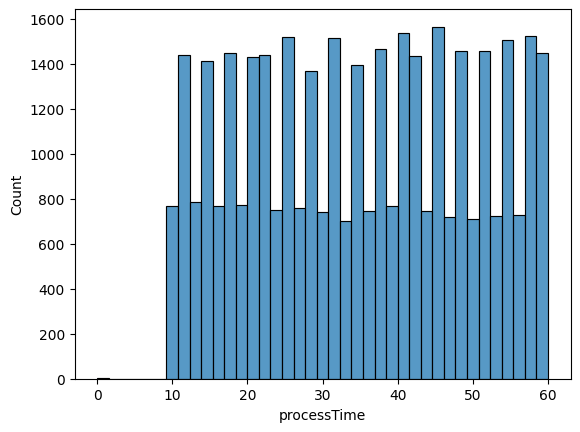

In [32]:
mu = 0.5

processTime = df2['processTime']
kstest_statistic, p_value = stats.kstest(df2['processTime'], 'poisson', args=(lambda_Poisson,0))
print(kstest_statistic, p_value)

sns.histplot(processTime)
